In [1]:
!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

File ‘all_stocks_5yr.csv’ already there; not retrieving.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('all_stocks_5yr.csv',parse_dates = True)

In [5]:
sbux = data[data['Name']=='SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<AxesSubplot:>

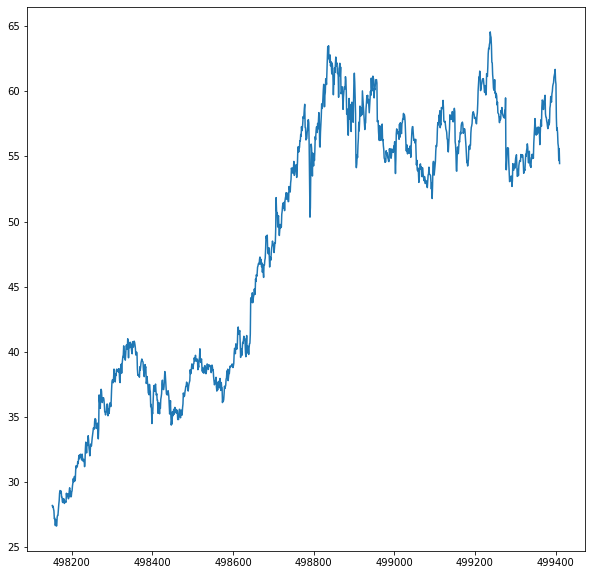

In [7]:
sbux['close'].plot(figsize=(10,10))

In [8]:
sbux['prev_close'] = sbux['close'].shift(1)

In [10]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [11]:
sbux['return'] = sbux['close']/sbux['prev_close'] - 1

In [12]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [13]:
sbux['return2'] =sbux['close'].pct_change(1)

In [14]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


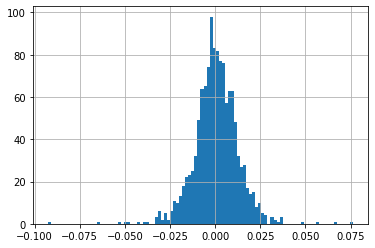

In [15]:
sbux['return'].hist(bins=100);

In [16]:
sbux['return'].mean(),sbux['return'].std()

(0.0006002332205830914, 0.012360934026133882)

In [17]:
sbux['log_return'] = np.log(sbux['return']+1)

In [18]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


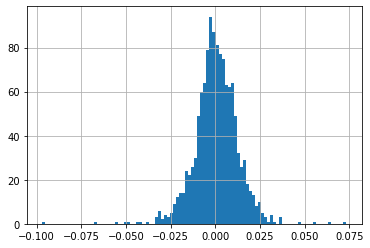

In [19]:
sbux['log_return'].hist(bins=100);

In [20]:
sbux['log_return'].mean(), sbux['log_return'].std()

(0.000523590274810868, 0.012381234216101253)

# Normal distribution

In [21]:
from scipy.stats import norm

In [22]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [23]:
y_list = norm.pdf(x_list,loc = sbux['return'].mean(),scale = sbux['return'].std())

<AxesSubplot:>

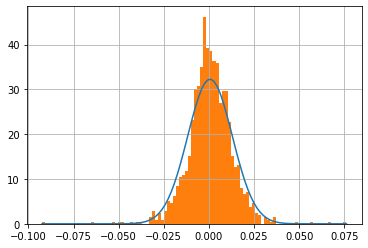

In [24]:
plt.plot(x_list,y_list);
sbux['return'].hist(bins=100,density = True)

In [25]:
from scipy.stats import probplot

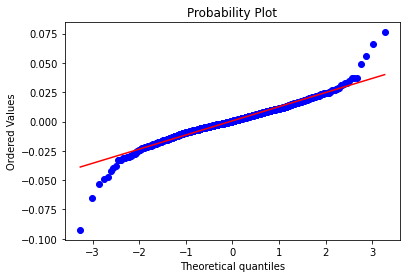

In [28]:
probplot(sbux['return'].dropna(),dist='norm',fit=True,plot = plt);

In [33]:
x = np.linspace(sbux['log_return'].min(),
                sbux['log_return'].max(),100)

In [34]:
y_list = norm.pdf(x_list,
                 loc=sbux['log_return'].mean(),
                 scale = sbux['log_return'].std())

<AxesSubplot:>

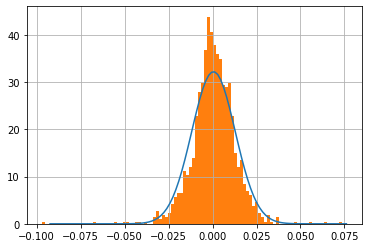

In [35]:
plt.plot(x_list,y_list);
sbux['log_return'].hist(bins=100,density=True)

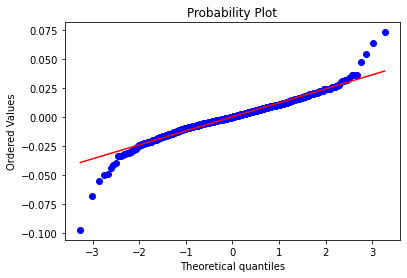

In [36]:
probplot(sbux['log_return'].dropna(),dist='norm',fit=True,plot = plt);

# t-distribution

In [37]:
from scipy.stats import t

In [38]:
x_list = np.linspace(sbux['return'].min(),
                     sbux['return'].max(),
                     100)

In [39]:
params = t.fit(sbux['return'].dropna())

In [43]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [44]:
df, loc, scale = params

In [45]:
y_list = t.pdf(x_list,df,loc,scale)

<AxesSubplot:>

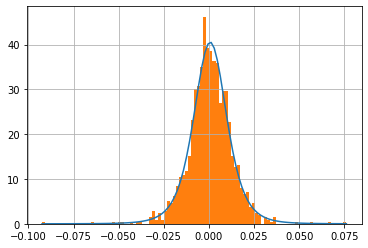

In [46]:
plt.plot(x_list,y_list);
sbux['return'].hist(bins=100,density = True)

In [52]:
import statsmodels.api as sm


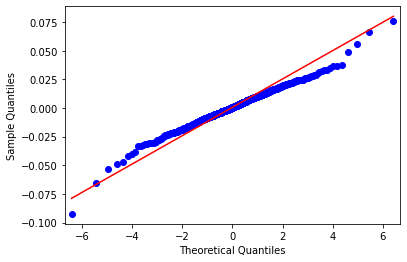

In [54]:
class myt:
    def __init__(self,df):
        self.df=df
    
    def fit(self,x):
        return t.fit(x)
    
    def ppf(self,x,loc=0,scale = 1):
        return t.ppf(x,self.df,loc,scale)
sm.qqplot(sbux['return'].dropna(),dist=myt(df),line='s');

In [55]:
 x_list=np.linspace(
     sbux['log_return'].min(),
     sbux['log_return'].max(),
     100)

In [56]:
params = t.fit(sbux['log_return'].dropna())

In [57]:
df,loc,scale = params

In [58]:
y_list=t.pdf(x_list,df,loc,scale)

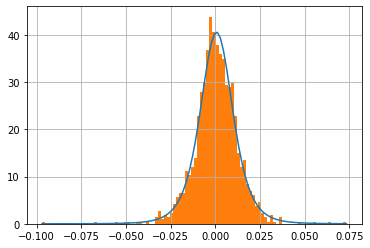

In [59]:
plt.plot(x_list,y_list);
sbux['log_return'].hist(bins=100,density=True);

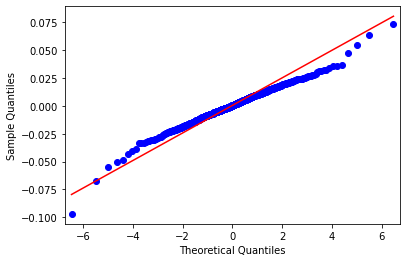

In [60]:
sm.qqplot(sbux['log_return'].dropna(),dist=myt(df),line='s');

In [61]:
sbux['return'].skew()

-0.2680784195824153

In [62]:
sbux['return'].kurtosis()

5.593158903424731

In [63]:
sbux['log_return'].skew()

-0.41015501490182066

In [64]:
sbux['log_return'].kurtosis()

5.964502225799283

In [65]:
samp = pd.Series(np.random.randn(10000))
samp.skew(),samp.kurtosis()

(0.05711690768210606, -0.017417330937920195)

# Confidence interval

In [66]:
values = sbux['return'].dropna().to_numpy()

In [68]:
m = values.mean()
s = values.std(ddof=1)

In [69]:
low = m-1.96*s/np.sqrt(len(values))
high = m +1.96*s/np.sqrt(len(values))

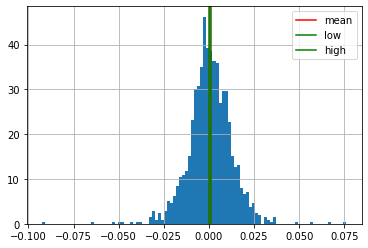

In [75]:
sbux['return'].hist(bins=100,density=True);
plt.axvline(m,label='mean',color='red');
plt.axvline(low,label='low',color='green');
plt.axvline(high,label='high',color='green');
plt.legend()

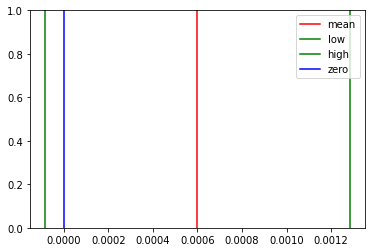

In [76]:
plt.axvline(m,label='mean',color='red');
plt.axvline(low,label='low',color='green');
plt.axvline(high,label='high',color='green');
plt.axvline(0,label='zero',color='blue');

plt.legend()

# Statistical Tests

In [77]:
from scipy.stats import jarque_bera, normaltest

In [78]:
jarque_bera(values)

Jarque_beraResult(statistic=1639.0284386552219, pvalue=0.0)

In [79]:
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [80]:
jarque_bera(sbux['log_return'].dropna())

Jarque_beraResult(statistic=1882.1814629047672, pvalue=0.0)

In [82]:
from scipy.stats import kstest

In [84]:
df,loc,scale = t.fit(values)
def cdf(x):
    return t.cdf(x,df,loc,scale)
kstest(values,cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063)

In [85]:
df,loc,scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
    return t.cdf(x,df,loc,scale)
kstest(sbux['log_return'].dropna(),cdf)

KstestResult(statistic=0.01837990941957013, pvalue=0.7818301159274575)

In [86]:
from scipy.stats import ttest_1samp

In [87]:
ttest_1samp(values,0)

Ttest_1sampResult(statistic=1.7223010261810556, pvalue=0.08526098717694539)

In [88]:
ttest_1samp(sbux['log_return'],0)

Ttest_1sampResult(statistic=nan, pvalue=nan)

In [90]:
mmm = data[data['Name']=='MMM'].copy()

<AxesSubplot:>

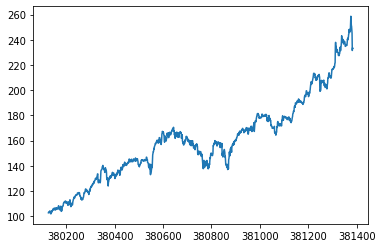

In [91]:
mmm['close'].plot()

In [92]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close']/mmm['prev_close']-1
mmm['log_return'] = np.log(mmm['return']+1)

In [93]:
mmm['return'].mean(),mmm['return'].std()

(0.0007001182500580143, 0.009768718404053087)

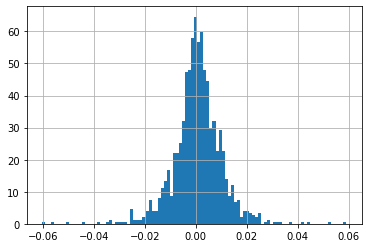

In [94]:
mmm['return'].hist(bins=100,density=True);

In [95]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m-1.96*s/np.sqrt(len(mmm['return']))
high = m+1.96*s/np.sqrt(len(mmm['return']))
print(low,high,m,s)

0.00016050724660541572 0.0012397292535106129 0.0007001182500580143 0.009768718404053087


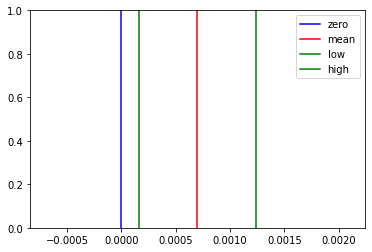

In [99]:
plt.xlim((low-0.001,high+0.001))
plt.axvline(0,label='zero',color='blue');
plt.axvline(m,label='mean',color='red');
plt.axvline(low,label = 'low',color = 'green')
plt.axvline(high,label = 'high',color= 'green');
plt.legend()

In [100]:
ttest_1samp(mmm['return'].dropna(),0)

Ttest_1sampResult(statistic=2.541991701703365, pvalue=0.011141496531324404)

In [101]:
ttest_1samp(mmm['log_return'].dropna(),0)

Ttest_1sampResult(statistic=2.365963115873947, pvalue=0.018134246809755054)

# Covariance and Correlation

In [109]:
close = pd.read_csv('sp500_close.csv')

975

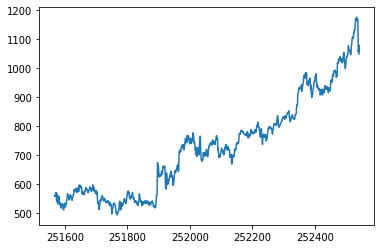

In [112]:
goog = data[data['Name']=='GOOG']
goog['close'].plot();
len(goog)

In [114]:
symbols = ['AAPL','GOOG','IBM','NFLX','SBUX']
sub = close[symbols].copy()

In [115]:
sub.dropna(axis=0,how='all',inplace=True)

In [116]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775


In [117]:
for symbol in symbols:
    sub[symbol+'_prev'] = sub[symbol].shift(1)
    sub[symbol+'_ret'] = sub[symbol]/sub[symbol+'_prev']-1

In [119]:
rets = sub[[symbol+'_ret' for symbol in symbols]].copy()

In [120]:
rets.head()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


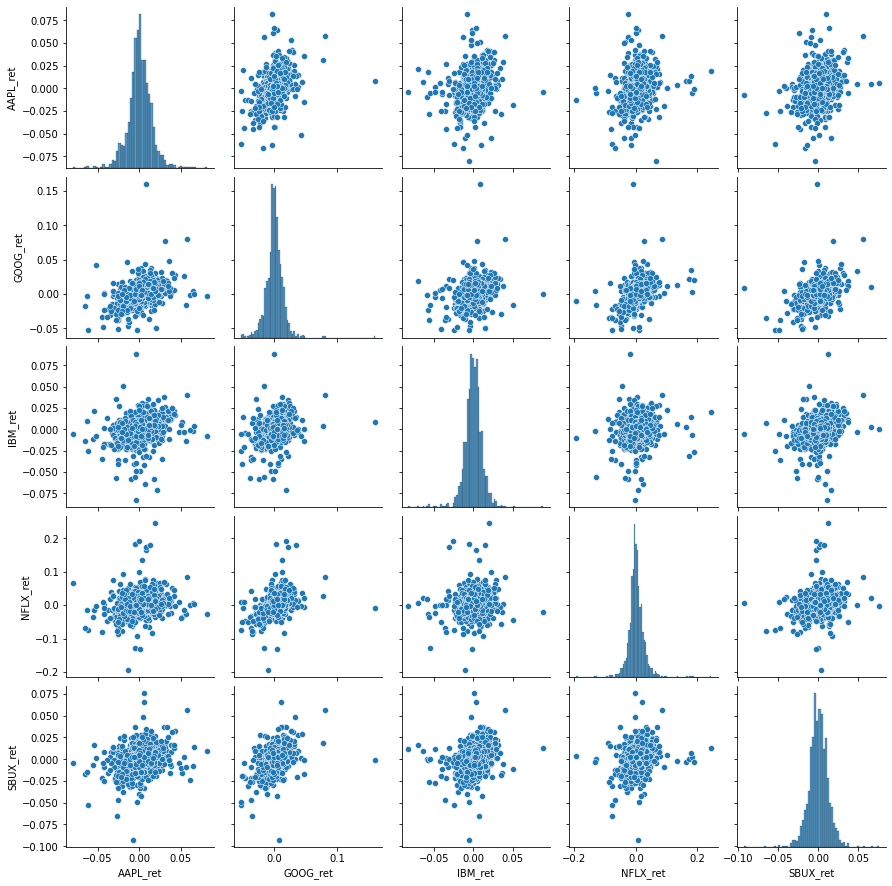

In [122]:
import seaborn as sns
sns.pairplot(rets)

In [123]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [124]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

Text(0, 0.5, 'Return')

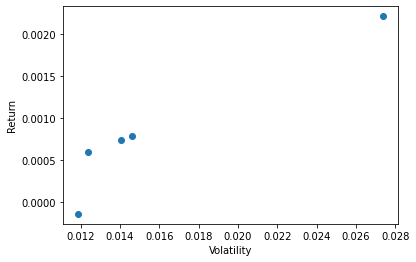

In [125]:
plt.scatter(rets.std(),rets.mean())
plt.xlabel('Volatility')
plt.ylabel('Return')

In [126]:
rets.corr()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [127]:
rets.cov()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153


# Mixture of Gaussians

In [129]:
x_list = np.linspace(-0.1,0.1,500)

In [130]:
p = 0.5
fx = p*norm.pdf(x_list,loc=0,scale=0.01)+\
      (1-p)*norm.pdf(x_list,loc=0,scale=0.002)

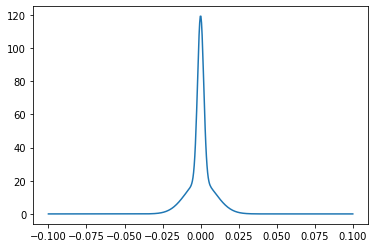

In [131]:
plt.plot(x_list,fx)

In [132]:
#generate samples from our model
samples = []
m0,s0 = 0, 0.01
m1,s1 = 0, 0.002

for _ in range(5000):
    if np.random.random()<p:
        #choose Gaussian 0
        x = norm.rvs(m0,s0)
    else:
        #choose Gaussian 1
        x = norm.rvs(m1,s1)
    samples.append(x)
series = pd.Series(samples)
series.kurtosis()

2.6660028841842296

In [142]:
from sklearn.mixture import GaussianMixture

In [146]:
data = sbux['log_return'].dropna().to_numpy().reshape(-1,1)
model = GaussianMixture(n_components=2)
model.fit(data)

weights=model.weights_
means = model.means_
cov = model.covariances_
print("weights:", weights)
print("means:", means)
print("variances:",cov)

weights: [0.3809082 0.6190918]
means: [[-0.00049004]
 [ 0.00114725]]
variances: [[[2.97119520e-04]]

 [[6.52014483e-05]]]


In [147]:
means = means.flatten()
var = cov.flatten()

In [149]:
x_list = np.linspace(data.min(),data.max(),100)
fx0 = norm.pdf(x_list,means[0],np.sqrt(var[0]))
fx1 = norm.pdf(x_list,means[1],np.sqrt(var[1]))
fx = weights[0]*fx0+weights[1]*fx1

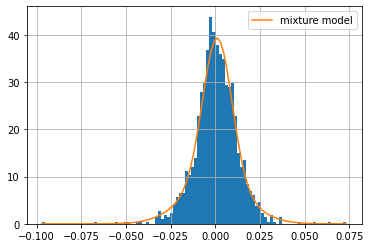

In [150]:
sbux['log_return'].hist(bins=100,density=True)
plt.plot(x_list,fx,label='mixture model')
plt.legend();

# Volatility Clustering

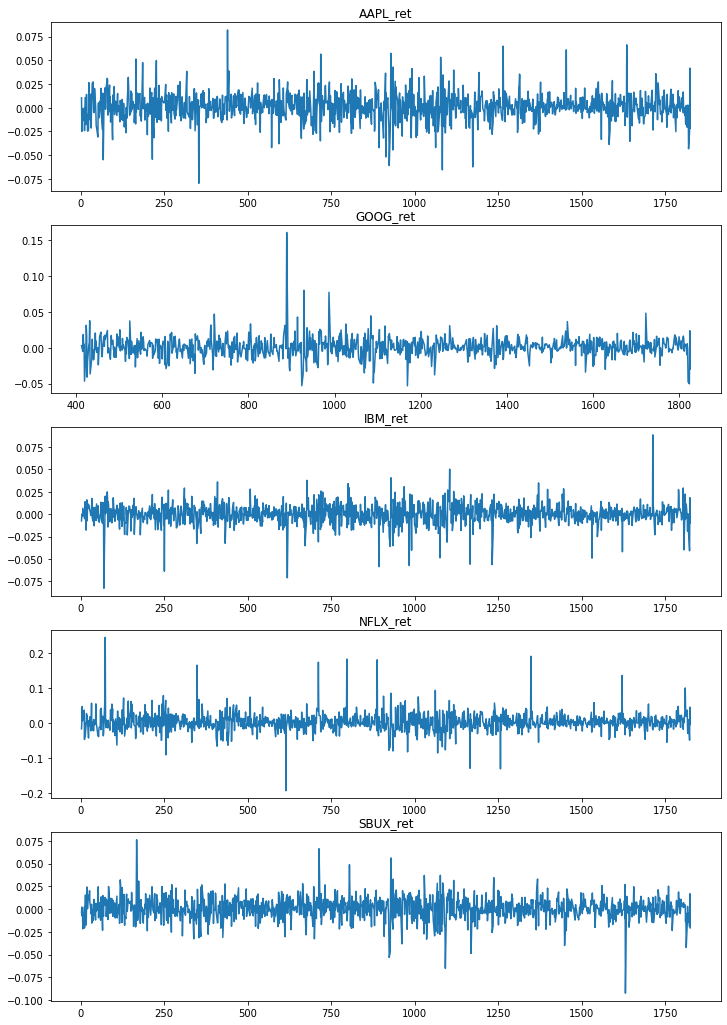

In [151]:
for i,symbol in enumerate(rets.columns):
    plt.subplot(len(rets.columns),1,i+1)
    plt.title(symbol)
    rets[symbol].plot(figsize=(12,18));

# Price Simulation

In [159]:
p0 = sbux.iloc[-1]['close']
prices = [p0]
returns =sbux['return'].dropna()
for _ in range(100):
    r = np.random.choice(returns)
    p = prices[-1]*(1+r)
    prices.append(p)

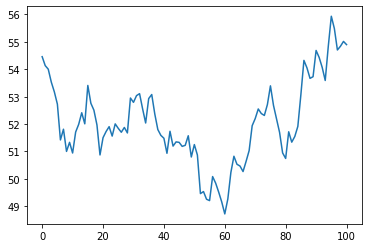

In [160]:
plt.plot(prices);

In [161]:
df,loc,scale = t.fit(sbux['return'].dropna())
p0 = sbux.iloc[-1]['close']
prices=[p0]
for _ in range(100):
    r = t.rvs(df,loc,scale)
    p = prices[-1]*(1+r)
    prices.append(p)

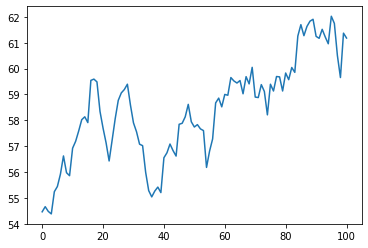

In [162]:
plt.plot(prices);